In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import src.utility.gen_ts_synthetic as gen_synthetic
import statsmodels.api as sm

In [2]:
np.random.seed(1)

season_length = 20
N = 200
residual = 0.5 * np.random.randn(N)
seasonal = gen_synthetic.sinewave(N,season_length,1)
sea_resid = residual + seasonal

In [3]:
randomness_residual = sm.stats.acorr_ljungbox(residual,lags=[min(2 * season_length, round(len(residual) / 5))], return_df=True)
randomness_seasonal = sm.stats.acorr_ljungbox(seasonal,lags=[min(2 * season_length, round(len(residual) / 5))], return_df=True)
randomness_sea_resid = sm.stats.acorr_ljungbox(sea_resid,lags=[min(2 * season_length, round(len(residual) / 5))], return_df=True)

print(f"Ljung-Box test on residual component: {randomness_residual}")
print(f"Ljung-Box test on seasonal component: {randomness_seasonal}")
print(f"Ljung-Box test on seasonal & residual components: {randomness_sea_resid}")

Ljung-Box test on residual component:       lb_stat  lb_pvalue
40  50.369261   0.126075
Ljung-Box test on seasonal component:         lb_stat  lb_pvalue
40  3616.867221        0.0
Ljung-Box test on seasonal & residual components:         lb_stat  lb_pvalue
40  2042.154349        0.0


Kruskal–Wallis test on residual component: KruskalResult(statistic=26.50758208955233, pvalue=0.11665615701614326)
Kruskal–Wallis test on seasonal component: KruskalResult(statistic=198.99999999999997, pvalue=5.381814027491032e-32)
Kruskal–Wallis test on seasonal & residual components: KruskalResult(statistic=155.63343283582094, pvalue=1.7849541151365895e-23)


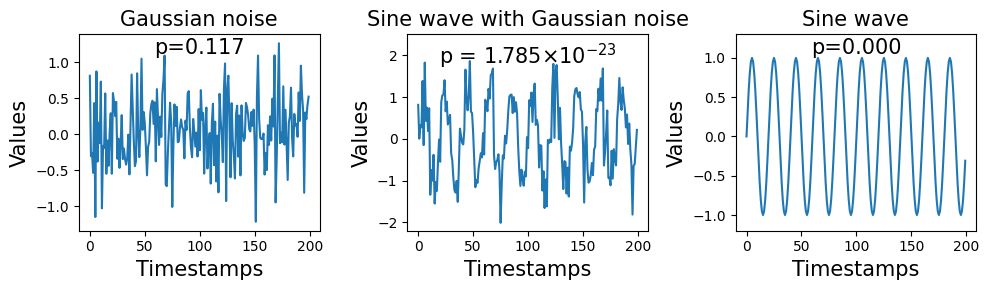

<Figure size 640x480 with 0 Axes>

In [4]:
random_subcycles = [[residual[i] for i in range(j, len(residual), season_length)] for j in range(season_length)]
sines_subcycles = [[seasonal[i] for i in range(j, len(seasonal), season_length)] for j in range(season_length)]
sinerandom_subcycles = [[sea_resid[i] for i in range(j, len(sea_resid), season_length)] for j in range(season_length)]

ks_random = stats.kruskal(*random_subcycles)
ks_sine = stats.kruskal(*sines_subcycles)
ks_sinerandom = stats.kruskal(*sinerandom_subcycles)

print(f"Kruskal–Wallis test on residual component: {ks_random}")
print(f"Kruskal–Wallis test on seasonal component: {ks_sine}")
print(f"Kruskal–Wallis test on seasonal & residual components: {ks_sinerandom}")


fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].plot(residual)
axes[0].set_title('Gaussian noise',  fontsize=15)
axes[0].set_xlabel('Timestamps', fontsize=15)
axes[0].set_ylabel('Values', fontsize=15)
axes[0].text(0.5, 0.9, f'p={ks_random.pvalue:.3f}', transform=axes[0].transAxes, ha='center', fontsize=15)

axes[1].plot(sea_resid)
axes[1].set_title('Sine wave with Gaussian noise', fontsize=15)
axes[1].set_xlabel('Timestamps', fontsize=15)
axes[1].set_ylabel('Values', fontsize=15)
axes[1].text(0.5, 0.85, f'p = {ks_sinerandom.pvalue:.3e}'.replace('e', r'$ \times 10^{') + '}$', transform=axes[1].transAxes, ha='center', fontsize=15)
axes[1].set_ylim([-2.2, 2.5])

axes[2].plot(seasonal)
axes[2].set_title('Sine wave', fontsize=15)
axes[2].set_xlabel('Timestamps', fontsize=15)
axes[2].set_ylabel('Values', fontsize=15)
axes[2].text(0.5, 0.9, f'p={ks_sine.pvalue:.3f}', transform=axes[2].transAxes, ha='center', fontsize=15)
axes[2].set_ylim([-1.2, 1.3])

plt.tight_layout()
plt.show()
plt.clf()